In [1]:
# Data Manipulation
import pandas as pd  # Import Pandas for data manipulation and analysis
import numpy as np  # Import NumPy for numerical operations

In [2]:
# Data Visualization
import seaborn as sns  # Import Seaborn for enhanced data visualization
import matplotlib.pyplot as plt  # Import Matplotlib for basic data visualization
import plotly.express as px
from wordcloud import WordCloud

In [3]:
# Machine Learning Models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [4]:
# Import Warnings to manage or ignore warning messages in the code
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the data from CSV file to Pandas DataFrame
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')

In [6]:
# Function to check number of rows and columns of dataset, number of missing values in each column,
# glimpse of the dataframe, statistical and important information about the dataset
def analysis(data):
    print(f'Data Size  : {data.size}')
    print(f'\nShape of the dataframe: {data.shape[0]} rows and {data.shape[1]} columns')
    print("*" * 100)
    print("\nDisplaying the initial records of the dataframe:")
    display(data.head())
    print("*" * 100)
    print("\nListing all the columns in the dataframe:")
    display(data.columns)
    print("*" * 100)
    print("\nTotal number of unique values in each column:\n")
    display(data.nunique()) 
    print("*" * 110)
    print("\nSome important information about the dataframe:\n")
    display(data.info())
    print("*" * 110)
    print("\nStatistical measures about the data:")
    display(data.describe())
    print("*" * 100)

In [8]:
# Initial analysis of the dataset
analysis(df)

Data Size  : 155090

Shape of the dataframe: 15509 rows and 10 columns
****************************************************************************************************

Displaying the initial records of the dataframe:


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


****************************************************************************************************

Listing all the columns in the dataframe:


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

****************************************************************************************************

Total number of unique values in each column:



Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

**************************************************************************************************************

Some important information about the dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


None

**************************************************************************************************************

Statistical measures about the data:


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


****************************************************************************************************


In [9]:
# Describe on object data types
df.describe(include='O')

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7920,14984,13892,13125,12365
unique,13838,102,182,485,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,227,58,158,83,91


In [10]:
# Displaying and dropping duplicate columns
print("Number of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of duplicate rows after dropping duplicates:", df.duplicated().sum())

Number of duplicate rows: 6
Number of duplicate rows after dropping duplicates: 0


In [11]:
# Dropping the duplicated values by Name and Year
df = df.drop_duplicates(subset=['Name', 'Year'], keep=False)
print("Shape after dropping duplicates by Name and Year:", df.shape)

Shape after dropping duplicates by Name and Year: (15467, 10)


In [12]:
# Checking null values in the dataframe
def missing_values_percent(dataframe):
    missing_values = dataframe.isna().sum()
    percentage_missing = (missing_values / len(dataframe) * 100).round(2)
    result_movie = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
    result_movie['Percentage'] = result_movie['Percentage'].astype(str) + '%'
    return result_movie

In [13]:
result = missing_values_percent(df)
print(result)

          Missing Values Percentage
Name                   0       0.0%
Year                 527      3.41%
Duration            8240     53.27%
Genre               1866     12.06%
Rating              7560     48.88%
Votes               7559     48.87%
Director             522      3.37%
Actor 1             1609      10.4%
Actor 2             2373     15.34%
Actor 3             3126     20.21%


In [14]:
# Locating missing values in the entire row except name column
nulls = df[df.iloc[:, 1:9].isna().all(axis=1)]
print("Rows with all nulls except Name column:")
display(nulls.head(10))

Rows with all nulls except Name column:


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1836,Bang Bang Reloaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,Battle of bittora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3403,Dancing Dad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3807,Dial 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4271,Durga Rani Singh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8669,Main Hoon Kaun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9600,Mughal Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


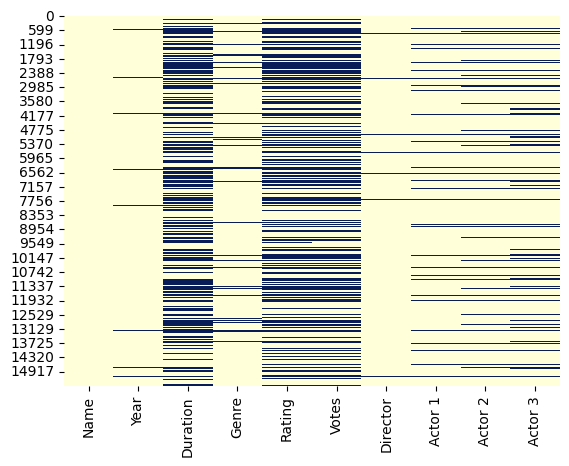

In [15]:
# Visualization of missing values
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.show()

In [16]:
# Dropping null values in the entire row except name column
df = df.dropna(subset=['Year', 'Duration', 'Genre','Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], how='all')
print("Shape after dropping nulls in entire row except Name column:", df.shape)

Shape after dropping nulls in entire row except Name column: (15459, 10)


In [17]:
# Dropping the null values for Duration, Rating and Votes columns since they have high percentage of null values
df.dropna(subset=['Duration', 'Rating', 'Votes'], inplace=True)

In [18]:
# Filling the null values of Genre, Director, and Actor 1 columns with their mode value
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)
df['Director'].fillna(df['Director'].mode()[0], inplace=True)
df['Actor 1'].fillna(df['Actor 1'].mode()[0], inplace=True)

In [19]:
# Displaying top directors and actors
Directors = df["Director"].value_counts()
print("Top 5 Directors:\n", Directors.head(5))

Top 5 Directors:
 Director
David Dhawan            42
Mahesh Bhatt            39
Ram Gopal Varma         34
Shakti Samanta          34
Hrishikesh Mukherjee    33
Name: count, dtype: int64


In [20]:
Actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).dropna().value_counts()
print("Top 5 Actors:\n", Actors.head(5))

Top 5 Actors:
 Amitabh Bachchan      223
Mithun Chakraborty    160
Dharmendra            146
Ashok Kumar           125
Akshay Kumar          120
Name: count, dtype: int64


In [21]:
# Filling the null values of Actor 2 and Actor 3 columns with a value 'None'
df['Actor 2'].fillna('None', inplace=True)
df['Actor 3'].fillna('None', inplace=True)

In [22]:
# Re-checking the null values in the dataframe
print(missing_values_percent(df))

          Missing Values Percentage
Name                   0       0.0%
Year                   0       0.0%
Duration               0       0.0%
Genre                  0       0.0%
Rating                 0       0.0%
Votes                  0       0.0%
Director               0       0.0%
Actor 1                0       0.0%
Actor 2                0       0.0%
Actor 3                0       0.0%


In [23]:
# Checking if there are any typos or any unnecessary special characters in the dataframe
for col in df.select_dtypes(include="object"):
    print(f"Name of Column: {col}")
    print(df[col].unique())
    print('\n', '*'*100, '\n')

Name of Column: Name
['#Gadhvi (He thought he was Gandhi)' '#Yaaram' '...Aur Pyaar Ho Gaya' ...
 'Zulm Ki Zanjeer' 'Zulmi' 'Zulm-O-Sitam']

 **************************************************************************************************** 

Name of Column: Year
['(2019)' '(1997)' '(2005)' '(2012)' '(2014)' '(2004)' '(2016)' '(1991)'
 '(2018)' '(2010)' '(1958)' '(2021)' '(2017)' '(2009)' '(1993)' '(2002)'
 '(2008)' '(1994)' '(2007)' '(2003)' '(1998)' '(1979)' '(1974)' '(2015)'
 '(2006)' '(1981)' '(2020)' '(1985)' '(2013)' '(2011)' '(1988)' '(1987)'
 '(1996)' '(1999)' '(1973)' '(1968)' '(1982)' '(1977)' '(1950)' '(1969)'
 '(1948)' '(1990)' '(1989)' '(2001)' '(2000)' '(1953)' '(1978)' '(1963)'
 '(1992)' '(1976)' '(1984)' '(1986)' '(1966)' '(1975)' '(1980)' '(1967)'
 '(1970)' '(1952)' '(1972)' '(1971)' '(1964)' '(1957)' '(1954)' '(1962)'
 '(1965)' '(1995)' '(1956)' '(1955)' '(1936)' '(1983)' '(1951)' '(1961)'
 '(1959)' '(1949)' '(1960)' '(1946)' '(1940)' '(1945)' '(1938)' '(1941)'
 '(19

In [24]:
# Extracting only the text part from the Name column
df['Name'] = df['Name'].str.extract('([A-Za-z\s\'\-]+) #.')

In [25]:
# Removing the brackets '()' from Year column and converting 'Year' column to numeric datatype
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True).astype(int)

In [26]:
# Converting 'Duration' to numeric datatype and removing 'min' from it
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(r' min', '', regex=True), errors='coerce')

In [27]:
# Displaying each unique Genre count
genres_count = df['Genre'].value_counts()
genres_count = pd.DataFrame(list(genres_count.items()))
genres_count = genres_count.rename(columns={0: 'Genre', 1: 'Count'})
print("Top Genres:\n", genres_count.head())

Top Genres:
                   Genre  Count
0                 Drama    899
1        Drama, Romance    334
2  Action, Crime, Drama    328
3         Action, Drama    207
4         Comedy, Drama    206


In [28]:
# Splitting the genre into different columns to keep only unique genres
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')

In [29]:
# Displaying each single Genre count after splitting the multiple genres
genre_counts = {}
for genre in df['Genre'].values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

In [30]:
GenreCounts = {genre: count for genre, count in sorted(genre_counts.items())}
print("Each Genre Count:")
for genre, count in GenreCounts.items():
    print(f"{genre}: {count}")

Each Genre Count:
Action: 1697
Adventure: 283
Animation: 56
Biography: 124
Comedy: 1351
Crime: 876
Documentary: 129
Drama: 3875
Family: 428
Fantasy: 147
History: 103
Horror: 205
Music: 55
Musical: 416
Mystery: 308
News: 2
Romance: 1382
Sci-Fi: 34
Sport: 44
Thriller: 684
War: 34
Western: 2


In [31]:
# Converting 'Votes' to numeric and removing comma and unnecessary space to keep only numerical part
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''), errors='coerce')

In [32]:
# Information of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12235 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1 non-null      object 
 1   Year      12235 non-null  int64  
 2   Duration  12235 non-null  int64  
 3   Genre     12235 non-null  object 
 4   Rating    12235 non-null  float64
 5   Votes     12235 non-null  int64  
 6   Director  12235 non-null  object 
 7   Actor 1   12235 non-null  object 
 8   Actor 2   12235 non-null  object 
 9   Actor 3   12235 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.0+ MB
None


In [33]:
# Displaying the Numerical columns and Object columns in the dataframe
num_list = df.select_dtypes(include='number').columns.tolist()
obj_list = df.select_dtypes(include='object').columns.tolist()
print(f'\nNumerical columns in the dataframe: {num_list}')
print(f'\nObject columns in the dataframe: {obj_list}')


Numerical columns in the dataframe: ['Year', 'Duration', 'Rating', 'Votes']

Object columns in the dataframe: ['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']


In [34]:
# Displaying the number of unique values for each numerical columns
for i in num_list:
    print(f"No. of unique values in {i} column are: {df[i].nunique()}")

No. of unique values in Year column are: 91
No. of unique values in Duration column are: 178
No. of unique values in Rating column are: 83
No. of unique values in Votes column are: 2028


In [35]:
# Displaying the number of unique values for each categorical columns
for i in obj_list:
    print(f"No. of unique values in {i} column are: {df[i].nunique()}")

No. of unique values in Name column are: 1
No. of unique values in Genre column are: 22
No. of unique values in Director column are: 2547
No. of unique values in Actor 1 column are: 2044
No. of unique values in Actor 2 column are: 2369
No. of unique values in Actor 3 column are: 2567


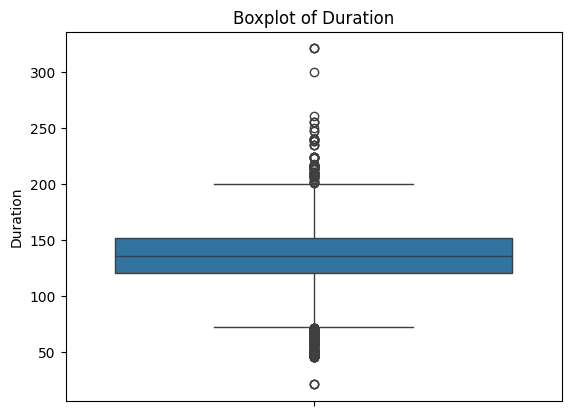

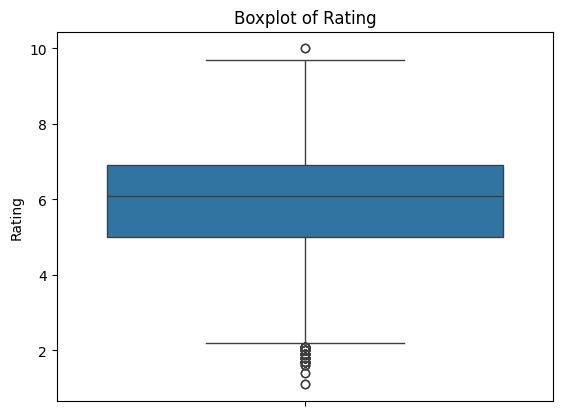

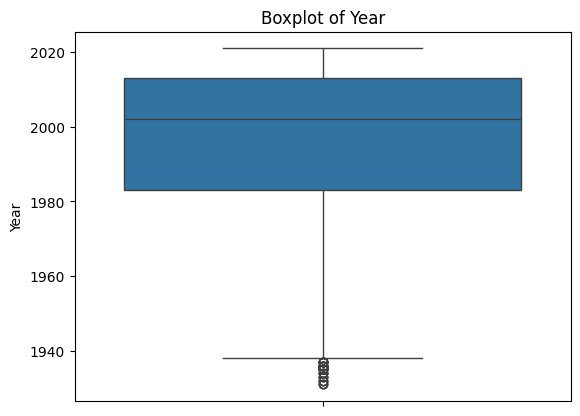

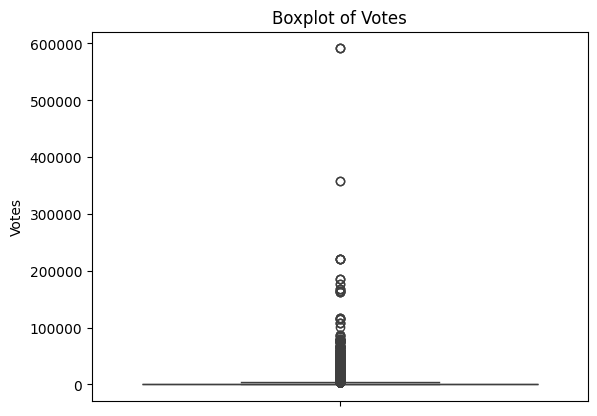

In [36]:
# Visualizing outliers using boxplot
columns_to_plot = ['Duration', 'Rating', 'Year', 'Votes']
for col in columns_to_plot:
    sns.boxplot(y=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [37]:
# Function to remove outliers by capping the values between upper bound and lower bound by IQR method
def outlier(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    return data.clip(lower_bound, upper_bound)

In [38]:
# Outlier Removal
for col in columns_to_plot:
    df[col] = outlier(df[col])

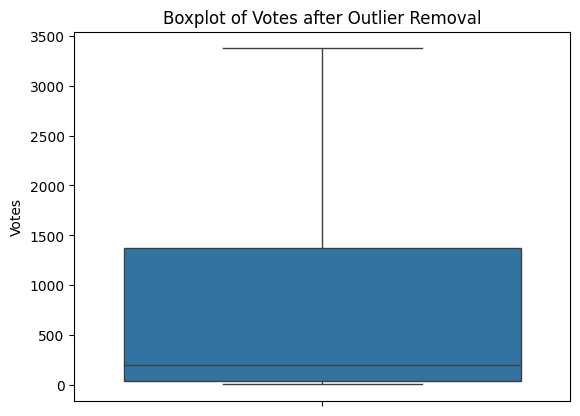

In [39]:
# Confirming Outlier Removal for 'Votes' column
sns.boxplot(y='Votes', data=df)
plt.title('Boxplot of Votes after Outlier Removal')
plt.show()

In [40]:
# Find the row with the highest number of votes
max_votes = df[df['Votes'] == df['Votes'].max()]
highest_votes = max_votes['Name'].values[0]
votes_highest_count = max_votes['Votes'].values[0]
print(f"Movie with the highest votes: {highest_votes}")
print(f"Highest number of votes for this movie: {votes_highest_count}")

Movie with the highest votes: nan
Highest number of votes for this movie: 3375.25


In [41]:
# Find the row with the lowest number of votes
min_votes = df[df['Votes'] == df['Votes'].min()]
lowest_votes = min_votes['Name'].values[0]
votes_lowest_count = min_votes['Votes'].values[0]
print(f"Movie with the lowest votes: {lowest_votes}")
print(f"Lowest number of votes for this movie: {votes_lowest_count}")

Movie with the lowest votes: nan
Lowest number of votes for this movie: 5.0


In [42]:
# Displaying unique years
unique_years = df['Year'].unique()
print(f"Unique Years in the dataset: {unique_years}")

Unique Years in the dataset: [2019 1997 2005 2012 2014 2004 2016 1991 2018 2010 1958 2021 2017 2009
 1993 2002 2008 1994 2007 2003 1998 1979 1974 2015 2006 1981 2020 1985
 2013 2011 1988 1987 1996 1999 1973 1968 1982 1977 1950 1969 1948 1990
 1989 2001 2000 1953 1978 1963 1992 1976 1984 1986 1966 1975 1980 1967
 1970 1952 1972 1971 1964 1957 1954 1962 1965 1995 1956 1955 1938 1983
 1951 1961 1959 1949 1960 1946 1940 1945 1941 1942 1947 1943 1944 1939]


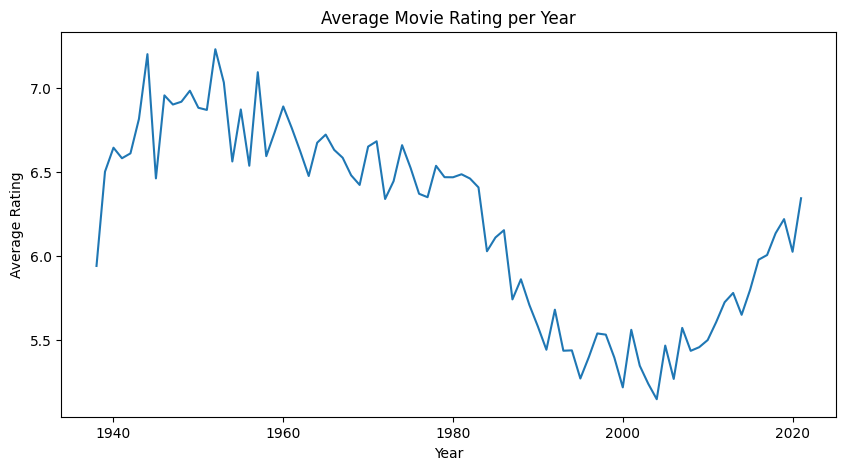

In [43]:
# Visualizing the trends of average movie rating per year
average_rating = df.groupby('Year')['Rating'].mean()
plt.figure(figsize=(10,5))
sns.lineplot(x=average_rating.index, y=average_rating.values)
plt.title('Average Movie Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

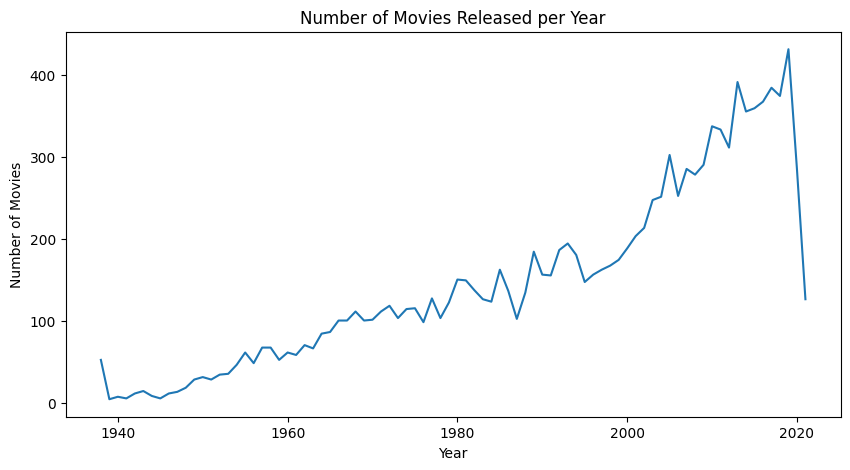

In [44]:
# Visualizing the number of movies released per year
movies_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

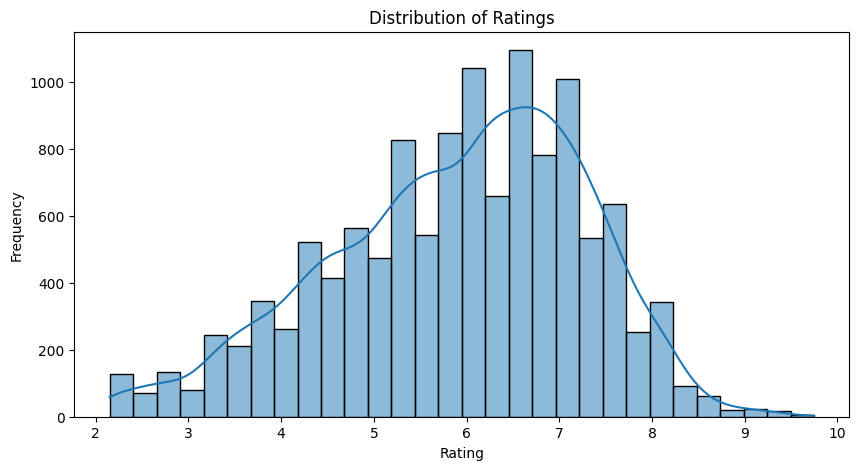

In [46]:
# Visualization of distribution of the Ratings
plt.figure(figsize=(10,5))
sns.histplot(df['Rating'], kde=True, bins=30)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [48]:
# Splitting the dataset into training and testing sets
X = df[['Year', 'Duration', 'Votes']]
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Models initialization
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Regression": SVR()
}

In [50]:
# Train and evaluate the models
model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate the evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    model_results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

In [51]:
# Display the evaluation metrics for all models
model_results_df = pd.DataFrame(model_results).T
print("\nEvaluation Metrics for All Models:")
print(model_results_df)


Evaluation Metrics for All Models:
                                MAE       MSE      RMSE  R2 Score
Linear Regression          1.006559  1.628903  1.276285  0.129017
Random Forest              0.430837  0.509633  0.713886  0.727497
Decision Tree              0.325838  0.712737  0.844238  0.618896
Gradient Boosting          0.842076  1.230897  1.109458  0.341833
XGBoost                    0.662247  0.840415  0.916742  0.550625
K-Nearest Neighbors        0.823102  1.215924  1.102690  0.349839
Support Vector Regression  1.031276  1.704006  1.305376  0.088859


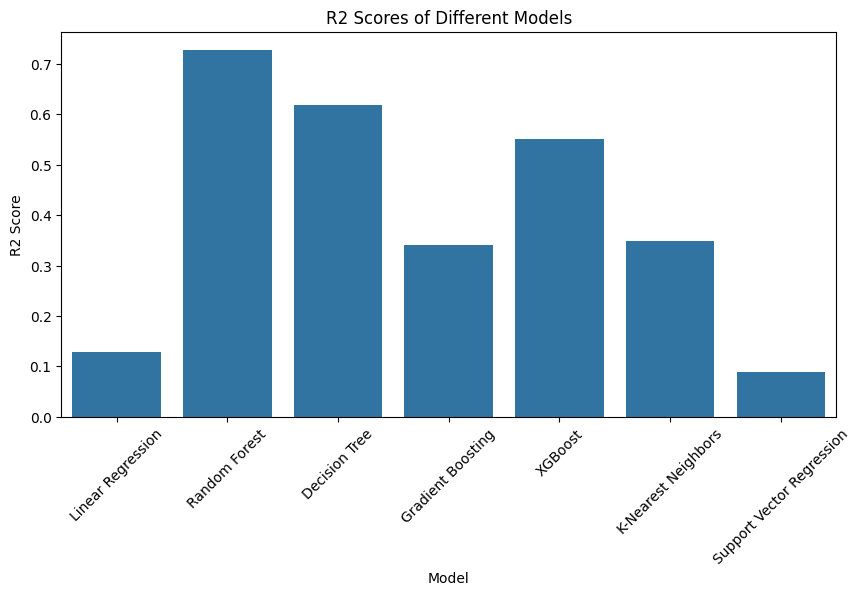

In [52]:
# Visualizing the R2 scores of the models
plt.figure(figsize=(10, 5))
sns.barplot(x=model_results_df.index, y=model_results_df['R2 Score'])
plt.title('R2 Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:






# Making a prediction using the best model (change model name accordingly)
best_model_name = model_results_df['R2 Score'].idxmax()
best_model = models[best_model_name]
new_data = [[2023, 140, 50000]]  # Example input for year, duration, votes
predicted_rating = best_model.predict(new_data)
print(f"\nPredicted Rating for the input data using {best_model_name}: {predicted_rating[0]}")

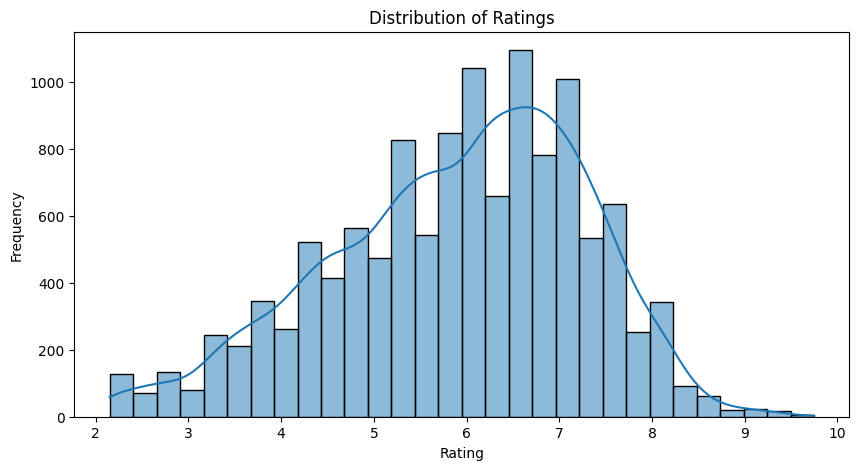

In [45]:
# Visualization of distribution of the Ratings
plt.figure(figsize=(10,5))
sns.histplot(df['Rating'], kde=True, bins=30)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()